<a href="https://colab.research.google.com/github/KaileyLiou/AI-Summer-Institute/blob/main/Loan_Default_Project_(Intro_to_Jupyter_Notebooks)_(Updated_July_8th%2C_2025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Name: Kailey

#Dataset is from a fictional bank.
#Their business consists of issuing loans. Their problem is that they know very little about
#their data. They have a data file that has over 300k loans they have issued. The dataset describes information
#about each loan. The dataset contains loan amount issued and many other fields that describe the client’s
#credit factors, such as whether they own their own home or not, their income, how long it has been since they
#were delinquent on an account, how many years since they received their first credit line, etc.
#The problem is that the bank has no idea who their clients are and what their data can tell them about their business.

In [ ]:
#Here are the steps to take:
# 1. Cleanse
# Look for null data in the table, and use the appropriate strategy to handle null data for each column.

# 2. Outliers
# Search the data for outliers and remove them.

# 3. Macro information Data.
# How much (total) does the bank have out in loans? How much are in default/late? What percentage of the business are
# default and late?

# 4. Who defaults or has problems repaying loans?
# Create visualizations to show who are in default/late.

# 5. Regression analysis with scoring and confusion matrix.

In [ ]:
#Libraries we need to run the code below:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('loans.csv')

In [ ]:
df.head()

,SK_ID_CURR,Unnamed: 1,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET
0,100002,NaN,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Laborers,1.0,0,0,0,0,0,0,Business Entity Type 3,1
1,100003,NaN,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Core staff,2.0,0,0,0,0,0,0,School,0
2,100004,NaN,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Laborers,1.0,0,0,0,0,0,0,Government,0
3,100006,NaN,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,0
4,100007,NaN,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Core staff,1.0,0,0,0,0,1,1,Religion,0


In [ ]:
df.drop(columns=['SK_ID_CURR', 'Unnamed: 1'], axis=1, inplace=True)

In [ ]:
#del df['SK_ID_CURR']
#or also can use:
#df = df.drop(columns = ['SK_ID_CURR'])

In [ ]:
#Delete the empty column
#df.drop(df.columns[0], axis=1, inplace=True)
#df.drop(df.columns[0], axis=1, inplace=True)

In [ ]:
df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,Laborers,1.0,0,0,0,0,0,0,Business Entity Type 3,1
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Core staff,2.0,0,0,0,0,0,0,School,0
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,Laborers,1.0,0,0,0,0,0,0,Government,0
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,0
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,Core staff,1.0,0,0,0,0,1,1,Religion,0


In [ ]:
df['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [ ]:
# 1. Cleanse
# Two strategies:
# 1. Drop the column entirely if it's not helpful data
# 2. Fill the null data with a descriptive statistic (mean, median, mode)

In [ ]:
df.info()
#df.info()
#We see that the following six columns have null data:
#AMT_ANNUITY (index 7), AMT_GOODS_PRICE (index 8), NAME_TYPE_SUITE (index 9), OWN_CAR_AGE (index 18),
#OCCUPATION_TYPE (index 25), CNT_FAM_MEMBERS (index 26)
#Note: These indices refer to the latest dataframe where two columns have been dropped.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_CONTRACT_TYPE           307511 non-null  object 
 1   CODE_GENDER                  307511 non-null  object 
 2   FLAG_OWN_CAR                 307511 non-null  object 
 3   FLAG_OWN_REALTY              307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   AMT_GOODS_PRICE              307233 non-null  float64
 9   NAME_TYPE_SUITE              306219 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [ ]:
#a. AMT_ANNUITY; Description: Loan Annuity
#Strategy: Fill the null data with the median value.
#I decided to choose this strategy because the AMT_ANNUITY column provides important information about
#how much each person is paying.
med1 = df['AMT_ANNUITY'].median()
med1
#Median: $24903
#med1 = df['AMT_ANNUITY'].median()
#med1

24903.0

In [ ]:
df['AMT_ANNUITY'].fillna(med1, inplace=True)
df.info() #We see that the null values have now been filled for the AMT_ANNUITY column!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_CONTRACT_TYPE           307511 non-null  object 
 1   CODE_GENDER                  307511 non-null  object 
 2   FLAG_OWN_CAR                 307511 non-null  object 
 3   FLAG_OWN_REALTY              307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307511 non-null  float64
 8   AMT_GOODS_PRICE              307233 non-null  float64
 9   NAME_TYPE_SUITE              306219 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

/tmp/ipython-input-15-3648668441.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AMT_ANNUITY'].fillna(med1, inplace=True)


In [ ]:
#b. AMT_GOODS_PRICE; Description: For consumer loans it is the price of the goods for which the loan is given
#Strategy: Fill the null data with the median value.
#I decided to choose this strategy because the AMT_GOODS_PRICE column provides important information about
#how much the goods, for which the loan was given, cost.
med2 = df['AMT_GOODS_PRICE'].median()
med2
#Median: $450,000
#med2 = df['AMT_GOODS_PRICE'].median()

450000.0

In [ ]:
df['AMT_GOODS_PRICE'].fillna(med2, inplace=True)
df.info() #We see that the null values have now been filled!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_CONTRACT_TYPE           307511 non-null  object 
 1   CODE_GENDER                  307511 non-null  object 
 2   FLAG_OWN_CAR                 307511 non-null  object 
 3   FLAG_OWN_REALTY              307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307511 non-null  float64
 8   AMT_GOODS_PRICE              307511 non-null  float64
 9   NAME_TYPE_SUITE              306219 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

/tmp/ipython-input-17-2119303866.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AMT_GOODS_PRICE'].fillna(med2, inplace=True)


In [ ]:
#c. NAME_TYPE_SUITE; Description: Who was accompanying client when he was applying for the loan
#Strategy: Drop the column entirely
#I decided to choose this strategy because the NAME_TYPE_SUITE column does not provide helpful information.
#The person accompanying the client is irrelevant to what we are interested in, namely, how fiscally
#responsible the person is.
del df['NAME_TYPE_SUITE']

In [ ]:
df.info() #Check that the column has been deleted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_CONTRACT_TYPE           307511 non-null  object 
 1   CODE_GENDER                  307511 non-null  object 
 2   FLAG_OWN_CAR                 307511 non-null  object 
 3   FLAG_OWN_REALTY              307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307511 non-null  float64
 8   AMT_GOODS_PRICE              307511 non-null  float64
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

In [ ]:
#d. OWN_CAR_AGE; Description: Age of client's car
#Strategy: Drop the column entirely
#I decided to choose this strategy because I deem the OWN_CAR_AGE column as not providing helpful information.
#The age of the client's car is irrelevant to what we are interested in, namely, how fiscally
#responsible the person is.
del df['OWN_CAR_AGE']

In [ ]:
df.info() #Check that the column has been deleted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_CONTRACT_TYPE           307511 non-null  object 
 1   CODE_GENDER                  307511 non-null  object 
 2   FLAG_OWN_CAR                 307511 non-null  object 
 3   FLAG_OWN_REALTY              307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307511 non-null  float64
 8   AMT_GOODS_PRICE              307511 non-null  float64
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

In [ ]:
#e. OCCUPATION_TYPE; Description: What kind of occupation does the client have
#Strategy: Fill the null data with NA.
#I decided to choose this strategy because the OCCUPATION_TYPE column provides relevant information about
#the person's industry which is related to their socioeconomic status (SES). Their SES may correlate with
#their level of fiscal responsibility. However, unlike the numerical data columns, this column contains
#categorical data, which makes it harder to generalize a default fill-in value. Therefore, I decided to fill it
#with the string 'NA'.
df['OCCUPATION_TYPE'].fillna('NA', inplace=True)

/tmp/ipython-input-22-1167855542.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OCCUPATION_TYPE'].fillna('NA', inplace=True)


In [ ]:
df.info() #We see that the null values have now been filled.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_CONTRACT_TYPE           307511 non-null  object 
 1   CODE_GENDER                  307511 non-null  object 
 2   FLAG_OWN_CAR                 307511 non-null  object 
 3   FLAG_OWN_REALTY              307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307511 non-null  float64
 8   AMT_GOODS_PRICE              307511 non-null  float64
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

In [ ]:
#f. CNT_FAM_MEMBERS; How many family members does client have
#Strategy: Fill the null data with the mode.
#I decided to choose this strategy because the CNT_FAM_MEMBERS column provides information about the person's
#family size which may relate to their cost of living. Though I predict a weak correlation between family size
#and the person defaulting on his/her loan, it may still be of interest. Here I choose to fill
#the null data with the median as I did for the other columns.
med3 = df['CNT_FAM_MEMBERS'].median()
med3

2.0

In [ ]:
df['CNT_FAM_MEMBERS'].fillna(med3, inplace=True)

/tmp/ipython-input-25-2785223998.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CNT_FAM_MEMBERS'].fillna(med3, inplace=True)


In [ ]:
df.info() #We see that the null values have now been filled.
#Part 1 complete!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_CONTRACT_TYPE           307511 non-null  object 
 1   CODE_GENDER                  307511 non-null  object 
 2   FLAG_OWN_CAR                 307511 non-null  object 
 3   FLAG_OWN_REALTY              307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307511 non-null  float64
 8   AMT_GOODS_PRICE              307511 non-null  float64
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

In [ ]:
# 2. Outliers
# Search the data for outliers and remove them. Use the appropriate outlier method(s). Show all work.
df.describe() #data frame statistics
#Outliers to consider:
#a. CNT_CHILDREN: max: 19 children
#b. AMT_INCOME_TOTAL: max: 1.17 x 10^8
#c. AMT_ANNUITY: max: $258025.50; compare with the mean of $27108.49
#d. CNT_FAM_MEMBERS: max: 20 members

#Note: I would consider the AMT_INCOME_TOTAL and the AMT_ANNUITY maxima to be valid data points.
#However, I interpreted this second part of the project as an exercise in removing outliers. Statistically,
#we can consider these to be outliers but if I were to actually complete this as a statistics project, I would
#keep these two maxima because it is plausible to have someone whose income is $1.17 x 10^8 and someone's
#annuity amount to be $258025.50.
#The CNT_CHILDREN and CNT_FAM_MEMBERS extrema seem improbable, though not impossible. My final decision
#was to remove these two maxima.

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TARGET
count,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,...,0.281066,0.056720,2.152664,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.080729
std,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,...,0.449521,0.231307,0.910679,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.272419
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,-15750.000000,-1213.000000,-4504.000000,-3254.000000,1.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12413.000000,-289.000000,-2010.000000,-1720.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,365243.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

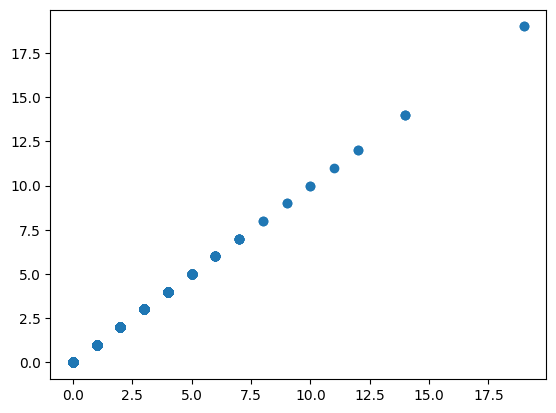

In [ ]:
#a. CNT_CHILDREN outliers
plt.scatter(df['CNT_CHILDREN'], df['CNT_CHILDREN']) #checking to see if there are other outliers besides the
#data point of 19 children
plt.show
#plt.scatter(df['CNT_CHILDREN'], df['CNT_CHILDREN'])

In [ ]:
#the maximum value for CNT_CHILDREN (a max value of 19) is well above the other values
childrenMax = df['CNT_CHILDREN'].max()
childrenMax
#childrenMax = df['CNT_CHILDREN'].max()
#childrenMax

19

In [ ]:
childrenMaxIndex = df[df['CNT_CHILDREN']==childrenMax].index.values
childrenMaxIndex
#Indices: 155369, 265784
#childrenMaxIndex = df[df['CNT_CHILDREN']==childrenMax].index.values

array([155369, 265784])

In [ ]:
df = df.drop(childrenMaxIndex)
#df = df.drop(childrenMaxIndex)

In [ ]:
df.describe() #Check to see that the two outliers have been dropped
#Success! The maximum for CNT_CHILDREN is now 14.

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TARGET
count,307509.000000,3.075090e+05,3.075090e+05,307509.000000,3.075090e+05,307509.000000,307509.000000,307509.000000,307509.000000,307509.000000,...,307509.000000,307509.000000,307509.000000,307509.000000,307509.000000,307509.000000,307509.000000,307509.000000,307509.000000,307509.000000
mean,0.416931,1.687983e+05,5.990286e+05,27108.590397,5.383186e+05,-16037.029928,63815.469889,-4986.127297,-2994.210973,0.999997,...,0.281062,0.056720,2.152548,0.015144,0.050769,0.040659,0.078173,0.230455,0.179556,0.080729
std,0.720567,2.371239e+05,4.024908e+05,14493.450947,3.692890e+05,4363.981307,141276.128113,3522.896099,1509.449710,0.001803,...,0.449518,0.231308,0.909544,0.122127,0.219527,0.197499,0.268445,0.421125,0.383818,0.272419
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,-19682.000000,-2760.000000,-7480.000000,-4299.000000,1.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,-15750.000000,-1213.000000,-4504.000000,-3254.000000,1.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12413.000000,-289.000000,-2010.000000,-1720.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,365243.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df['NAME_CONTRACT_TYPE']

,NAME_CONTRACT_TYPE
0,Cash loans
1,Cash loans
2,Revolving loans
3,Cash loans
4,Cash loans
...,...
307506,Cash loans
307507,Cash loans
307508,Cash loans
307509,Cash loans


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307509 entries, 0 to 307510
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_CONTRACT_TYPE           307509 non-null  object 
 1   CODE_GENDER                  307509 non-null  object 
 2   FLAG_OWN_CAR                 307509 non-null  object 
 3   FLAG_OWN_REALTY              307509 non-null  object 
 4   CNT_CHILDREN                 307509 non-null  int64  
 5   AMT_INCOME_TOTAL             307509 non-null  float64
 6   AMT_CREDIT                   307509 non-null  float64
 7   AMT_ANNUITY                  307509 non-null  float64
 8   AMT_GOODS_PRICE              307509 non-null  float64
 9   NAME_INCOME_TYPE             307509 non-null  object 
 10  NAME_EDUCATION_TYPE          307509 non-null  object 
 11  NAME_FAMILY_STATUS           307509 non-null  object 
 12  NAME_HOUSING_TYPE            307509 non-null  object 
 13  DAYS

<function matplotlib.pyplot.show(close=None, block=None)>

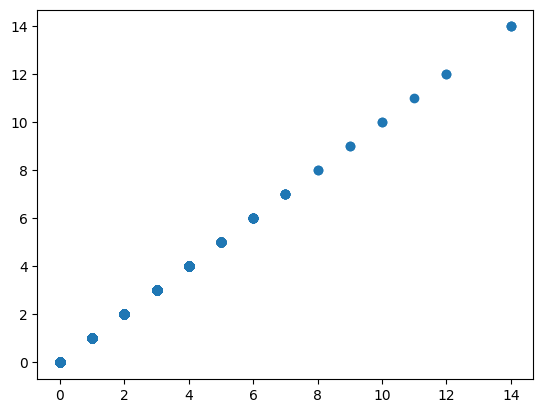

In [ ]:
plt.scatter(df['CNT_CHILDREN'], df['CNT_CHILDREN']) #checking the data points again
plt.show
#We now have a much more compact data set in terms of CNT_CHILDREN.

<function matplotlib.pyplot.show(close=None, block=None)>

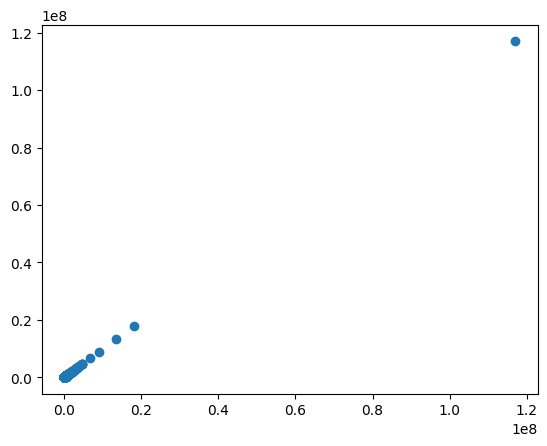

In [ ]:
#b. AMT_INCOME_TOTAL outliers
plt.scatter(df['AMT_INCOME_TOTAL'], df['AMT_INCOME_TOTAL']) #checking to see if there are other outliers besides the
#data point of $1.17 x 10^8
plt.show

In [ ]:
#We see from the scatterplot that the data point of $1.17 x 10^8 is far above the others. Let's remove it.
amtIncomeMax = df['AMT_INCOME_TOTAL'].max()
amtIncomeMax
#117,000,000

117000000.0

In [ ]:
amtIncomeMaxIndex = df[df['AMT_INCOME_TOTAL']==amtIncomeMax].index.values
amtIncomeMaxIndex
#Index: 12840
#amtIncomeMaxIndex = df[df['AMT_INCOME_TOTAL']==amtIncomeMax].index.values

array([12840])

In [ ]:
df = df.drop(amtIncomeMaxIndex)

In [ ]:
df.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TARGET
count,307508.000000,3.075080e+05,3.075080e+05,307508.000000,3.075080e+05,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,...,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000
mean,0.416929,1.684184e+05,5.990287e+05,27108.593370,5.383189e+05,-16037.041056,63815.680412,-4986.121522,-2994.208863,0.999997,...,0.281063,0.056720,2.152546,0.015144,0.050769,0.040659,0.078174,0.230456,0.179556,0.080726
std,0.720567,1.088121e+05,4.024914e+05,14493.474419,3.692896e+05,4363.984039,141276.309590,3522.900371,1509.451711,0.001803,...,0.449519,0.231308,0.909544,0.122127,0.219527,0.197500,0.268445,0.421125,0.383818,0.272415
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,-19682.000000,-2760.000000,-7480.000000,-4299.000000,1.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,-15750.000000,-1213.500000,-4504.000000,-3254.000000,1.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12413.000000,-289.000000,-2009.750000,-1720.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.000000,1.800009e+07,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,365243.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

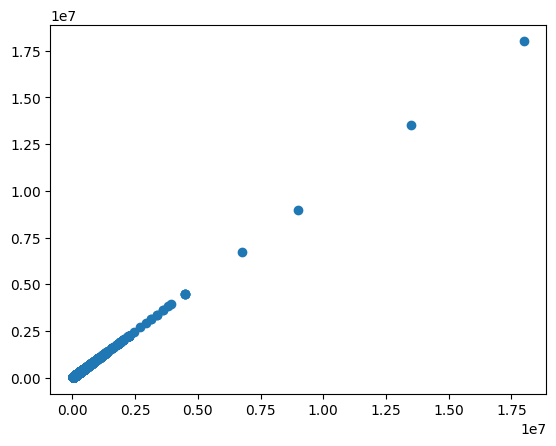

In [ ]:
plt.scatter(df['AMT_INCOME_TOTAL'], df['AMT_INCOME_TOTAL']) #checking the data points again
plt.show
#We now have a more compact data set in terms of AMT_INCOME_TOTAL but it's still spread out.
#Let's drop values using the IQR.

In [ ]:
#Find Inter Quartile Range (IQR)
#Find the middle of the range between quantile 1 and quantile 3
#Added in 7/8/2025
#Select only numeric columns before quantile
Q1 = df.select_dtypes(include='number').quantile(0.25)
Q3 = df.select_dtypes(include='number').quantile(0.75)
#Defunct code below:
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)

In [ ]:
#subtract Q3 from Q1 - this will give the desired range of data
IQR = Q3 - Q1
#here are the ranges for the entire table
print(IQR)
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3-Q1
#print(IQR)

CNT_CHILDREN                        1.00
AMT_INCOME_TOTAL                90000.00
AMT_CREDIT                     538650.00
AMT_ANNUITY                     18072.00
AMT_GOODS_PRICE                441000.00
DAYS_BIRTH                       7269.00
DAYS_EMPLOYED                    2471.00
DAYS_REGISTRATION                5470.25
DAYS_ID_PUBLISH                  2579.00
FLAG_MOBIL                          0.00
FLAG_EMP_PHONE                      0.00
FLAG_WORK_PHONE                     0.00
FLAG_CONT_MOBILE                    0.00
FLAG_PHONE                          1.00
FLAG_EMAIL                          0.00
CNT_FAM_MEMBERS                     1.00
REG_REGION_NOT_LIVE_REGION          0.00
REG_REGION_NOT_WORK_REGION          0.00
LIVE_REGION_NOT_WORK_REGION         0.00
REG_CITY_NOT_LIVE_CITY              0.00
REG_CITY_NOT_WORK_CITY              0.00
LIVE_CITY_NOT_WORK_CITY             0.00
TARGET                              0.00
dtype: float64


In [ ]:
#IQR just for the AMT_INCOME_TOTAL column
IQRincomeTotal =  Q3['AMT_INCOME_TOTAL'] - Q1['AMT_INCOME_TOTAL']
IQRincomeTotal

np.float64(90000.0)

In [ ]:
#set the lower acceptable limit
#any value less than Q1 - (1.5*IQR) will be considered an outlier
below = Q1['AMT_INCOME_TOTAL'] - 1.5 * IQRincomeTotal
below
#A negative value of -22500 so there won't be any lower outliers

np.float64(-22500.0)

In [ ]:
#set the higher acceptable limit
#any value above Q3 + (3*IQR) will be considered an outlier
above = Q3['AMT_INCOME_TOTAL'] + 3 * IQRincomeTotal
above
#Note: After seeing the initial higher limit of $337,500.00, I decided to change the outlier coefficient from
#1.5 to 3 to exclude only the extreme outliers.
#above = 472500.0

np.float64(472500.0)

In [ ]:
#Anything outside of above ($472,500.00) and below ($-22,500) will be considered an outlier.
#The rows below are outliers. They are outside of the range of above and below.
#This will show the list of outliers.
df.loc[(df['AMT_INCOME_TOTAL']<below) | (df['AMT_INCOME_TOTAL'] > above)]
#df.loc[(df['AMT_INCOME_TOTAL'] < below) | (df['AMT_INCOME_TOTAL'] > above)]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET
51,Cash loans,M,Y,Y,1,540000.0,675000.0,34596.0,675000.0,Commercial associate,...,Managers,3.0,0,0,0,0,0,0,Services,0
59,Cash loans,M,Y,Y,0,540000.0,1227901.5,46899.0,1129500.0,Working,...,Managers,1.0,0,0,0,0,0,0,Business Entity Type 3,0
319,Revolving loans,M,Y,Y,0,765000.0,1350000.0,67500.0,1350000.0,Commercial associate,...,Managers,1.0,0,0,0,1,1,0,Business Entity Type 3,0
332,Cash loans,F,N,Y,0,630000.0,900000.0,57519.0,900000.0,Working,...,High skill tech staff,2.0,0,0,0,0,0,0,Business Entity Type 3,0
391,Revolving loans,M,Y,Y,3,607500.0,1350000.0,67500.0,1350000.0,Commercial associate,...,Managers,5.0,0,0,0,0,0,0,Other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306882,Cash loans,M,Y,Y,0,517500.0,2250000.0,59485.5,2250000.0,Working,...,Managers,2.0,0,0,0,0,0,0,Industry: type 9,0
307002,Cash loans,M,Y,N,0,546250.5,1800000.0,166572.0,1800000.0,Commercial associate,...,NA,2.0,1,1,0,1,1,0,Insurance,0
307022,Cash loans,M,N,Y,0,540000.0,625536.0,38398.5,540000.0,Commercial associate,...,Managers,2.0,0,1,1,0,0,0,Self-employed,0
307484,Cash loans,F,Y,N,0,540000.0,545040.0,35617.5,450000.0,Commercial associate,...,Managers,2.0,0,0,0,0,0,0,Business Entity Type 3,0


In [ ]:
#Now we will create a new dataframe with only the non outliers.
#Notice how the logic is flipped from the above statement.
#This excludes all outliers and is written to a new dataframe.
#To save keystrokes later on, I'll call it df2 instead of df_no_outlier
df2 = df.loc[(df['AMT_INCOME_TOTAL'] >= below) & (df['AMT_INCOME_TOTAL'] <= above)]
df2
#At this point, there are now 304495 entries compared to the 307511 we started with.
#df2=df.loc[(df['AMT_INCOME_TOTAL'] >= below) & (df['AMT_INCOME_TOTAL'] <= above)]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,...,Laborers,1.0,0,0,0,0,0,0,Business Entity Type 3,1
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,...,Core staff,2.0,0,0,0,0,0,0,School,0
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,...,Laborers,1.0,0,0,0,0,0,0,Government,0
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,...,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,0
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,...,Core staff,1.0,0,0,0,0,1,1,Religion,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,...,Sales staff,1.0,0,0,0,0,0,0,Services,0
307507,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,...,NA,1.0,0,0,0,0,0,0,XNA,0
307508,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,...,Managers,1.0,0,0,0,0,1,1,School,0
307509,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,...,Laborers,2.0,0,0,0,1,1,0,Business Entity Type 1,1


<function matplotlib.pyplot.show(close=None, block=None)>

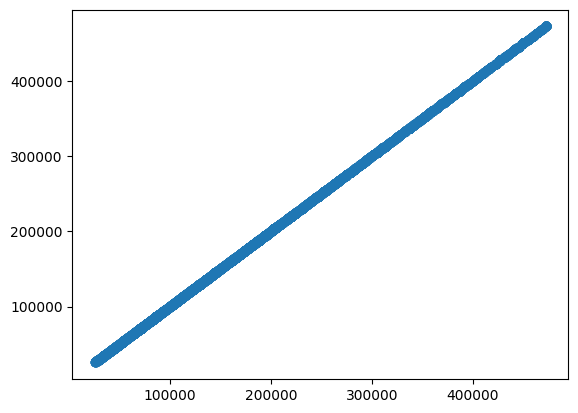

In [ ]:
plt.scatter(df2['AMT_INCOME_TOTAL'], df2['AMT_INCOME_TOTAL']) #checking the data points again
plt.show
#Now very compact in terms of income!

<function matplotlib.pyplot.show(close=None, block=None)>

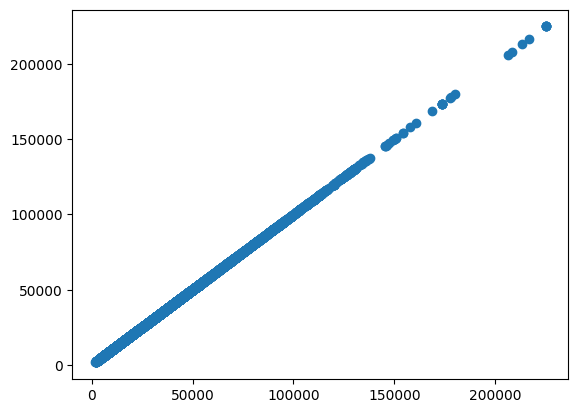

In [ ]:
#c. AMT_ANNUITY outliers
plt.scatter(df2['AMT_ANNUITY'], df2['AMT_ANNUITY']) #let's examine the AMT_ANNUITY column
plt.show

In [ ]:
#After dropping the outliers in the AMT_INCOME_TOTAL column,
#the original maximum for AMT_ANNUITY ($258,025.50) was dropped as well.
amtAnnuityMax = df2['AMT_ANNUITY'].max()
amtAnnuityMax
#The new maximum is $225,000.00

225000.0

In [ ]:
amtAnnuityMaxIndex = df2[df2['AMT_ANNUITY']==amtAnnuityMax].index.values
amtAnnuityMaxIndex
#Indices: 15501,  32100, 144204, 145707, 265026

array([ 15501,  32100, 144204, 145707, 265026])

In [ ]:
#We no longer have an outlier value to drop in AMT_ANNUITY (since we dropped them when dealing with the
#AMT_INCOME_TOTAL column).

<function matplotlib.pyplot.show(close=None, block=None)>

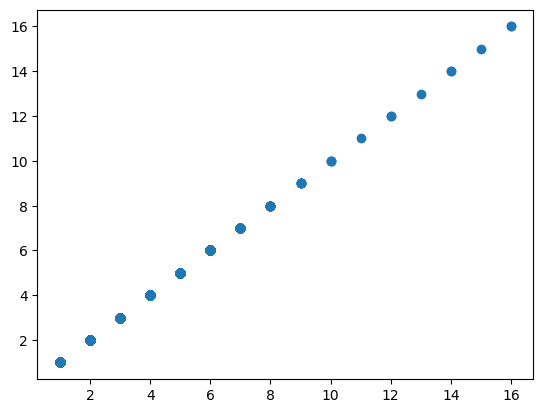

In [ ]:
#d. CNT_FAM_MEMBERS outliers
plt.scatter(df2['CNT_FAM_MEMBERS'], df2['CNT_FAM_MEMBERS']) #And now let's explore the CNT_FAM_MEMBERS column
plt.show
#It seems the original outlier of 20 family members has been removed so no need to remove any more data points
#from this column.

In [ ]:
#After dropping everything, let's reset the index values:
df2 = df2.reset_index(drop=True)
df2
#df2 = df2.reset_index(drop=True)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,...,Laborers,1.0,0,0,0,0,0,0,Business Entity Type 3,1
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,...,Core staff,2.0,0,0,0,0,0,0,School,0
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,...,Laborers,1.0,0,0,0,0,0,0,Government,0
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,...,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,0
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,...,Core staff,1.0,0,0,0,0,1,1,Religion,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304490,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,...,Sales staff,1.0,0,0,0,0,0,0,Services,0
304491,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,...,NA,1.0,0,0,0,0,0,0,XNA,0
304492,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,...,Managers,1.0,0,0,0,0,1,1,School,0
304493,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,...,Laborers,2.0,0,0,0,1,1,0,Business Entity Type 1,1


In [ ]:
#Part 2 complete!

In [ ]:
# 3. Who are our clients?
# The ABC Management team has no idea who their customers are. They don’t know anything about the type of
# employment and age, income of their clients. They need to know some macro information about their data.
# How much (total) do they have out in loans? How much are in default/late? What percentage of the business are
# default and late?
# Along with the information above, provide three other demographics of their customers.
# Remember, we are dealing with senior management. The charts must be readable, meaningful and at a summary level.
# Use at least one groupby or bin in your analysis.

In [ ]:
#a. Type of employment
dfEmploySub = df2.groupby(['OCCUPATION_TYPE'])['OCCUPATION_TYPE'].count()
#dfEmploySub = df2.groupby(['OCCUPATION_TYPE'])['OCCUPATION_TYPE'].count()

In [ ]:
dfEmploySub

,OCCUPATION_TYPE
OCCUPATION_TYPE,
Accountants,9641
Cleaning staff,4646
Cooking staff,5942
Core staff,27299
Drivers,18496
HR staff,555
High skill tech staff,11270
IT staff,506
Laborers,55011


In [ ]:
type(dfEmploySub)

pandas.core.series.Series

Text(0, 0.5, 'Occupation Type')

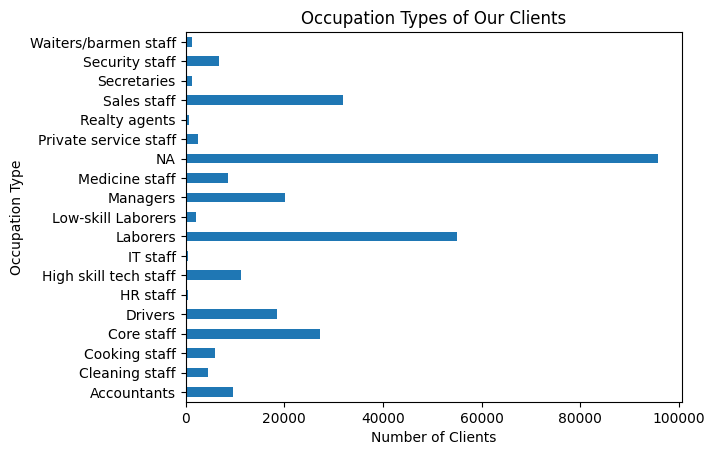

In [ ]:
dfEmploySub.plot(kind = 'barh', title = 'Occupation Types of Our Clients')
plt.xlabel('Number of Clients')
plt.ylabel('Occupation Type')
#We see that, unfortunately, almost 100,000 clients did not provide information about their occupation type.
#The industries with the largest counts among our clients are laborers, sales staff, core staff, and managers.
#dfEmploySub.plot(kind = 'barh', title = 'Occupation Type of Our Clients')
#plt.xlabel('Number of Clients')
#plt.ylabel('Occupation Type')

In [ ]:
#Drop Occupation Type because there are too many NAs
df2.drop(['OCCUPATION_TYPE'], axis=1, inplace=True) #8/1/22

In [ ]:
#b. Age of Clients
#Adding in an age column since our dataset has their age in days at the time of application.
#And it's a negative number so I will divide by negative 365 days.
df2['AGE'] = df2['DAYS_BIRTH']/(-365)
#df2['AGE'] = df2['DAYS_BIRTH']/(-365)

In [ ]:
df2

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET,AGE
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,...,1.0,0,0,0,0,0,0,Business Entity Type 3,1,25.920548
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,...,2.0,0,0,0,0,0,0,School,0,45.931507
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,...,1.0,0,0,0,0,0,0,Government,0,52.180822
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,...,2.0,0,0,0,0,0,0,Business Entity Type 3,0,52.068493
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,...,1.0,0,0,0,0,1,1,Religion,0,54.608219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304490,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,...,1.0,0,0,0,0,0,0,Services,0,25.553425
304491,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,...,1.0,0,0,0,0,0,0,XNA,0,56.917808
304492,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,...,1.0,0,0,0,0,1,1,School,0,41.002740
304493,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,...,2.0,0,0,0,1,1,0,Business Entity Type 1,1,32.769863


In [ ]:
#For exam:
df2.describe()
df2['Age Bin'] = pd.cut(df2['AGE'], bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])
#create a new column in the dataframe
#use the cut method
df2['Age Bin']
(df2[['Age Bin', 'AGE']])

#Let's give our own bin names
df2['Age Bin'] = pd.cut(df2['AGE'],
                        [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
                        labels=['20-25','25-30','30-35','35-40','40-45','45-50', '50-55', '55-60', '60-65', '65-70'])
df2

#Make sure that all buckets are filled or there may be issues running the report!
df2.info()
#Verified that the new Age Bin column has no null values (304495 non-null).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304495 entries, 0 to 304494
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   NAME_CONTRACT_TYPE           304495 non-null  object  
 1   CODE_GENDER                  304495 non-null  object  
 2   FLAG_OWN_CAR                 304495 non-null  object  
 3   FLAG_OWN_REALTY              304495 non-null  object  
 4   CNT_CHILDREN                 304495 non-null  int64   
 5   AMT_INCOME_TOTAL             304495 non-null  float64 
 6   AMT_CREDIT                   304495 non-null  float64 
 7   AMT_ANNUITY                  304495 non-null  float64 
 8   AMT_GOODS_PRICE              304495 non-null  float64 
 9   NAME_INCOME_TYPE             304495 non-null  object  
 10  NAME_EDUCATION_TYPE          304495 non-null  object  
 11  NAME_FAMILY_STATUS           304495 non-null  object  
 12  NAME_HOUSING_TYPE            304495 non-null

<function matplotlib.pyplot.show(close=None, block=None)>

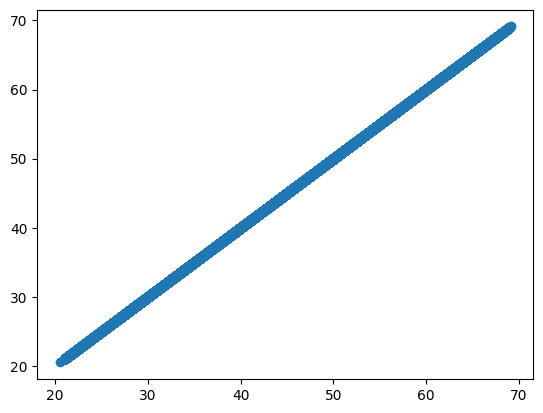

In [ ]:
#Check the spread of the age data before creating bins:
plt.scatter(df2['AGE'], df2['AGE'])
plt.show
#plt.scatter(df2['AGE'], df2['AGE'])

In [ ]:
df2.describe()
#Min age is 20.517808; Max age is 69.120548

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,FLAG_EMAIL,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TARGET,AGE
count,304495.000000,304495.000000,3.044950e+05,304495.000000,3.044950e+05,304495.000000,304495.000000,304495.000000,304495.000000,304495.000000,...,304495.000000,304495.000000,304495.000000,304495.000000,304495.000000,304495.000000,304495.000000,304495.00000,304495.000000,304495.000000
mean,0.416082,162992.684297,5.938634e+05,26870.292634,5.333510e+05,-16040.086507,64244.475647,-4993.887118,-2994.885867,0.999997,...,0.055860,2.151388,0.014848,0.049781,0.039787,0.078244,0.230841,0.17975,0.080996,43.945442
std,0.719799,77646.252688,3.967534e+05,14077.313438,3.634480e+05,4371.545253,141629.676655,3524.123661,1508.976369,0.001812,...,0.229651,0.908940,0.120943,0.217492,0.195459,0.268556,0.421372,0.38398,0.272830,11.976836
min,0.000000,25650.000000,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,20.517808
25%,0.000000,112500.000000,2.700000e+05,16456.500000,2.385000e+05,-19695.000000,-2754.000000,-7490.000000,-4299.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,33.989041
50%,0.000000,144000.000000,5.094000e+05,24750.000000,4.500000e+05,-15754.000000,-1208.000000,-4512.000000,-3255.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,43.161644
75%,1.000000,202500.000000,8.086500e+05,34371.000000,6.795000e+05,-12406.000000,-285.000000,-2020.000000,-1721.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,53.958904
max,14.000000,472500.000000,4.050000e+06,225000.000000,4.050000e+06,-7489.000000,365243.000000,0.000000,0.000000,1.000000,...,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,69.120548


In [ ]:
df2['Age Bin'] = pd.cut(df2['AGE'], bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])
#create a new column in the dataframe
#use the cut method

In [ ]:
df2['Age Bin']

,Age Bin
0,"(25, 30]"
1,"(45, 50]"
2,"(50, 55]"
3,"(50, 55]"
4,"(50, 55]"
...,...
304490,"(25, 30]"
304491,"(55, 60]"
304492,"(40, 45]"
304493,"(30, 35]"


In [ ]:
(df2[['Age Bin', 'AGE']])

,Age Bin,AGE
0,"(25, 30]",25.920548
1,"(45, 50]",45.931507
2,"(50, 55]",52.180822
3,"(50, 55]",52.068493
4,"(50, 55]",54.608219
...,...,...
304490,"(25, 30]",25.553425
304491,"(55, 60]",56.917808
304492,"(40, 45]",41.002740
304493,"(30, 35]",32.769863


In [ ]:
#Let's give our own bin names
df2['Age Bin'] = pd.cut(df2['AGE'],
                        [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
                        labels=['20-25','25-30','30-35','35-40','40-45','45-50', '50-55', '55-60', '60-65', '65-70'])
df2
#Note to Prof. Feldman: I know that in our class example we did not overlap the labels but I decided to do so here.
#The original labels were '20-25', '26-30', etc. However, if we label it this way, the first data point with
#an age of 25.92 would fall under the label '26-30' which would be incorrect.

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET,AGE,Age Bin
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,...,0,0,0,0,0,0,Business Entity Type 3,1,25.920548,25-30
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,...,0,0,0,0,0,0,School,0,45.931507,45-50
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,...,0,0,0,0,0,0,Government,0,52.180822,50-55
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,...,0,0,0,0,0,0,Business Entity Type 3,0,52.068493,50-55
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,...,0,0,0,0,1,1,Religion,0,54.608219,50-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304490,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,...,0,0,0,0,0,0,Services,0,25.553425,25-30
304491,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,...,0,0,0,0,0,0,XNA,0,56.917808,55-60
304492,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,...,0,0,0,0,1,1,School,0,41.002740,40-45
304493,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,...,0,0,0,1,1,0,Business Entity Type 1,1,32.769863,30-35


In [ ]:
#Make sure that all buckets are filled or there may be issues running the report!
df2.info()
#Verified that the new Age Bin column has no null values (304495 non-null).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304495 entries, 0 to 304494
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   NAME_CONTRACT_TYPE           304495 non-null  object  
 1   CODE_GENDER                  304495 non-null  object  
 2   FLAG_OWN_CAR                 304495 non-null  object  
 3   FLAG_OWN_REALTY              304495 non-null  object  
 4   CNT_CHILDREN                 304495 non-null  int64   
 5   AMT_INCOME_TOTAL             304495 non-null  float64 
 6   AMT_CREDIT                   304495 non-null  float64 
 7   AMT_ANNUITY                  304495 non-null  float64 
 8   AMT_GOODS_PRICE              304495 non-null  float64 
 9   NAME_INCOME_TYPE             304495 non-null  object  
 10  NAME_EDUCATION_TYPE          304495 non-null  object  
 11  NAME_FAMILY_STATUS           304495 non-null  object  
 12  NAME_HOUSING_TYPE            304495 non-null

/tmp/ipython-input-73-844406557.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfAgeSub = df2.groupby(['Age Bin'])['Age Bin'].count() #isolate the Age Bin column


Text(0, 0.5, 'Number of Clients')

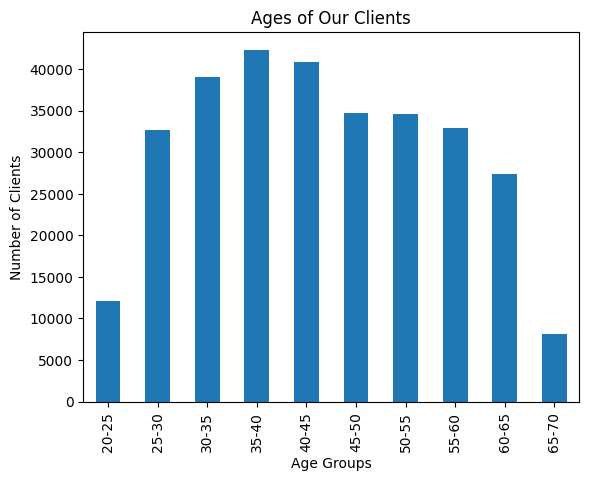

In [ ]:
#Exam:
df2.head(50)
dfAgeSub = df2.groupby(['Age Bin'])['Age Bin'].count() #isolate the Age Bin column
dfAgeSub
dfAgeSub.plot(kind = 'bar', title = 'Ages of Our Clients')
plt.xlabel('Age Groups')
plt.ylabel('Number of Clients')
#We see that the age group with the most clients is the 35-40 age group.

In [ ]:
df2.head(50)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET,AGE,Age Bin
0,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Working,...,0,0,0,0,0,0,Business Entity Type 3,1,25.920548,25-30
1,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,State servant,...,0,0,0,0,0,0,School,0,45.931507,45-50
2,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Working,...,0,0,0,0,0,0,Government,0,52.180822,50-55
3,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,Working,...,0,0,0,0,0,0,Business Entity Type 3,0,52.068493,50-55
4,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,Working,...,0,0,0,0,1,1,Religion,0,54.608219,50-55
5,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,State servant,...,0,0,0,0,0,0,Other,0,46.413699,45-50
6,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,1395000.0,Commercial associate,...,0,0,0,0,0,0,Business Entity Type 3,0,37.747945,35-40
7,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,1530000.0,State servant,...,0,0,0,0,1,1,Other,0,51.643836,50-55
8,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Pensioner,...,0,0,0,0,0,0,XNA,0,55.065753,55-60
9,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,405000.0,Working,...,0,0,0,0,0,0,Electricity,0,39.641096,35-40


In [ ]:
dfAgeSub = df2.groupby(['Age Bin'])['Age Bin'].count() #isolate the Age Bin column

/tmp/ipython-input-75-1667146934.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfAgeSub = df2.groupby(['Age Bin'])['Age Bin'].count() #isolate the Age Bin column


In [ ]:
dfAgeSub

,Age Bin
Age Bin,
20-25,12132
25-30,32625
30-35,39021
35-40,42323
40-45,40847
45-50,34674
50-55,34579
55-60,32852
60-65,27344


Text(0, 0.5, 'Number of Clients')

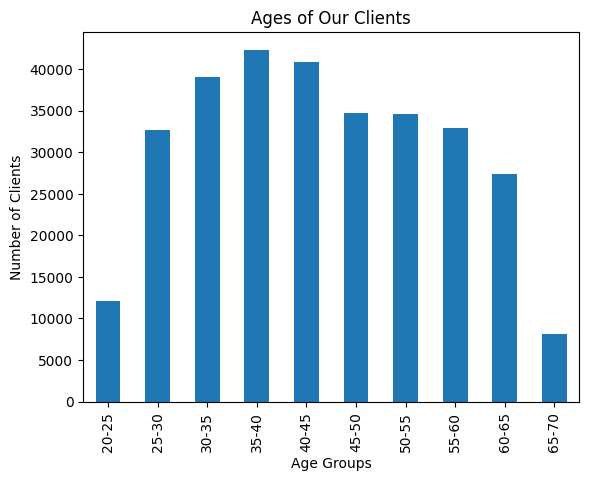

In [ ]:
dfAgeSub.plot(kind = 'bar', title = 'Ages of Our Clients')
plt.xlabel('Age Groups')
plt.ylabel('Number of Clients')
#We see that the age group with the most clients is the 35-40 age group.

In [ ]:
#Note to self/Prof. Feldman: I originally tried using the following code to graph age.
#This code mimics what we did in class but I ran into errors running these.

#Attempt 1:
#df2.plot(x=df2['Age Bin'], y=df2['AGE'], kind = 'bar', title = 'Ages of Our Clients')

#Attempt 2:
#A simple bar plot
#plt.bar(df2['Age Bin'], df2['AGE'], color = 'b')
#plt.show()

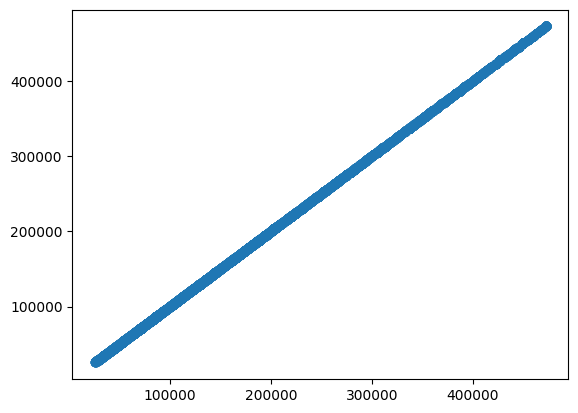

In [ ]:
#c. Income of Clients
#Check the spread of the age data before creating bins:
plt.scatter(df2['AMT_INCOME_TOTAL'], df2['AMT_INCOME_TOTAL'])
plt.show()

In [ ]:
df2.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,FLAG_EMAIL,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TARGET,AGE
count,304495.000000,304495.000000,3.044950e+05,304495.000000,3.044950e+05,304495.000000,304495.000000,304495.000000,304495.000000,304495.000000,...,304495.000000,304495.000000,304495.000000,304495.000000,304495.000000,304495.000000,304495.000000,304495.00000,304495.000000,304495.000000
mean,0.416082,162992.684297,5.938634e+05,26870.292634,5.333510e+05,-16040.086507,64244.475647,-4993.887118,-2994.885867,0.999997,...,0.055860,2.151388,0.014848,0.049781,0.039787,0.078244,0.230841,0.17975,0.080996,43.945442
std,0.719799,77646.252688,3.967534e+05,14077.313438,3.634480e+05,4371.545253,141629.676655,3524.123661,1508.976369,0.001812,...,0.229651,0.908940,0.120943,0.217492,0.195459,0.268556,0.421372,0.38398,0.272830,11.976836
min,0.000000,25650.000000,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,20.517808
25%,0.000000,112500.000000,2.700000e+05,16456.500000,2.385000e+05,-19695.000000,-2754.000000,-7490.000000,-4299.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,33.989041
50%,0.000000,144000.000000,5.094000e+05,24750.000000,4.500000e+05,-15754.000000,-1208.000000,-4512.000000,-3255.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,43.161644
75%,1.000000,202500.000000,8.086500e+05,34371.000000,6.795000e+05,-12406.000000,-285.000000,-2020.000000,-1721.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,53.958904
max,14.000000,472500.000000,4.050000e+06,225000.000000,4.050000e+06,-7489.000000,365243.000000,0.000000,0.000000,1.000000,...,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,69.120548


In [ ]:
#create a new column called Income Bin in the dataframe using the cut method
df2['Income Bin'] = pd.cut(df2['AMT_INCOME_TOTAL'],
                           bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000])

In [ ]:
df2

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET,AGE,Age Bin,Income Bin
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,...,0,0,0,0,0,Business Entity Type 3,1,25.920548,25-30,"(200000, 250000]"
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,...,0,0,0,0,0,School,0,45.931507,45-50,"(250000, 300000]"
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,...,0,0,0,0,0,Government,0,52.180822,50-55,"(50000, 100000]"
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,...,0,0,0,0,0,Business Entity Type 3,0,52.068493,50-55,"(100000, 150000]"
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,...,0,0,0,1,1,Religion,0,54.608219,50-55,"(100000, 150000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304490,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,...,0,0,0,0,0,Services,0,25.553425,25-30,"(150000, 200000]"
304491,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,...,0,0,0,0,0,XNA,0,56.917808,55-60,"(50000, 100000]"
304492,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,...,0,0,0,1,1,School,0,41.002740,40-45,"(150000, 200000]"
304493,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,...,0,0,1,1,0,Business Entity Type 1,1,32.769863,30-35,"(150000, 200000]"


In [ ]:
#Let's give our own bin names
df2['Income Bin'] = pd.cut(df2['AMT_INCOME_TOTAL'],
                        [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000],
                        labels=['0-50k','50k-100k','100k-150k','150k-200k','200k-250k','250k-300k', '300k-350k',
                                '350k-400k', '400k-450k', '450k-500k'])
df2

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET,AGE,Age Bin,Income Bin
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,...,0,0,0,0,0,Business Entity Type 3,1,25.920548,25-30,200k-250k
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,...,0,0,0,0,0,School,0,45.931507,45-50,250k-300k
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,...,0,0,0,0,0,Government,0,52.180822,50-55,50k-100k
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,...,0,0,0,0,0,Business Entity Type 3,0,52.068493,50-55,100k-150k
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,...,0,0,0,1,1,Religion,0,54.608219,50-55,100k-150k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304490,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,...,0,0,0,0,0,Services,0,25.553425,25-30,150k-200k
304491,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,...,0,0,0,0,0,XNA,0,56.917808,55-60,50k-100k
304492,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,...,0,0,0,1,1,School,0,41.002740,40-45,150k-200k
304493,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,...,0,0,1,1,0,Business Entity Type 1,1,32.769863,30-35,150k-200k


In [ ]:
df2[['Income Bin', 'AMT_INCOME_TOTAL']] #checking if making bins worked all right

,Income Bin,AMT_INCOME_TOTAL
0,200k-250k,202500.0
1,250k-300k,270000.0
2,50k-100k,67500.0
3,100k-150k,135000.0
4,100k-150k,121500.0
...,...,...
304490,150k-200k,157500.0
304491,50k-100k,72000.0
304492,150k-200k,153000.0
304493,150k-200k,171000.0


In [ ]:
df2.info() #Verifying that all Income Bin rows are filled (304495 non-null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304495 entries, 0 to 304494
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   NAME_CONTRACT_TYPE           304495 non-null  object  
 1   CODE_GENDER                  304495 non-null  object  
 2   FLAG_OWN_CAR                 304495 non-null  object  
 3   FLAG_OWN_REALTY              304495 non-null  object  
 4   CNT_CHILDREN                 304495 non-null  int64   
 5   AMT_INCOME_TOTAL             304495 non-null  float64 
 6   AMT_CREDIT                   304495 non-null  float64 
 7   AMT_ANNUITY                  304495 non-null  float64 
 8   AMT_GOODS_PRICE              304495 non-null  float64 
 9   NAME_INCOME_TYPE             304495 non-null  object  
 10  NAME_EDUCATION_TYPE          304495 non-null  object  
 11  NAME_FAMILY_STATUS           304495 non-null  object  
 12  NAME_HOUSING_TYPE            304495 non-null

In [ ]:
dfIncomeSub = df2.groupby(['Income Bin'])['Income Bin'].count() #Isolate the Income Bin column
dfIncomeSub

/tmp/ipython-input-86-4022074287.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfIncomeSub = df2.groupby(['Income Bin'])['Income Bin'].count() #Isolate the Income Bin column


,Income Bin
Income Bin,
0-50k,4517
50k-100k,59181
100k-150k,91589
150k-200k,64307
200k-250k,48137
250k-300k,17039
300k-350k,8874
350k-400k,5802
400k-450k,4924


Text(0, 0.5, 'Number of Clients')

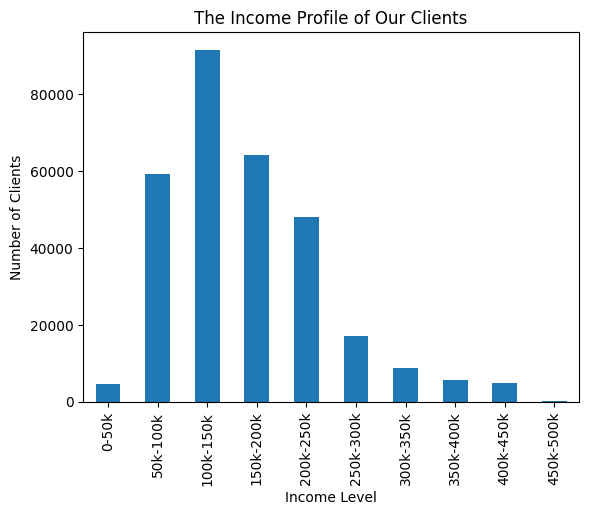

In [ ]:
dfIncomeSub.plot(kind = 'bar', title = 'The Income Profile of Our Clients')
plt.xlabel('Income Level')
plt.ylabel('Number of Clients')
#Note: It's not visible on the plot but there were 125 clients in the 450k-500k income bracket.
#We see that the majority of our clients have an income between $50,000 and $250,000.
#There are some in the 0-50k income bracket and a minority of our clients have above $250,000.

In [ ]:
#Total out in loans
df2['AMT_CREDIT'].sum()
#$180,828,450,571.5

np.float64(180828450571.5)

In [ ]:
#d. Total out in loans
df2['AMT_CREDIT'].sum()
#Answer (after omitting outliers): $180,828,450,571.50 ~ 180 billion
#Note: Before omitting any outliers, the answer was $184,207,084,195.5 ~ 184 billion

np.float64(180828450571.5)

In [ ]:
#e. How many loans are in default/late?
df2['TARGET'].sum()
#Answer: 24,663 loans are in default/late
#Note: Before omitting any outliers, the answer was 24825 loans.

np.int64(24663)

In [ ]:
#f. What percentage of the business are default and late?
#The numerator uses the sum method which adds all the ones.
#(The ones represent the loans that are in default/late.)
#The denominator uses the count method which counts all rows.
(df2['TARGET'].sum()/df2['TARGET'].count())*100
#Answer: 8.099640388183714 percent.
#Note: Before omitting any outliers, the answer was 8.072881945686495 percent.
#After omitting outliers, the percentage went slightly up (by 0.02).
#(df2['TARGET'].sum()/df2['TARGET'].count())*100

np.float64(8.099640388183714)

In [ ]:
#Three other demographics
#g. Level of highest education the client achieved
dfEduSub = df2.groupby(['NAME_EDUCATION_TYPE'])['NAME_EDUCATION_TYPE'].count()
dfEduSub

,NAME_EDUCATION_TYPE
NAME_EDUCATION_TYPE,
Academic degree,156
Higher education,72890
Incomplete higher,10143
Lower secondary,3807
Secondary / secondary special,217499


Text(0, 0.5, 'Number of Clients')

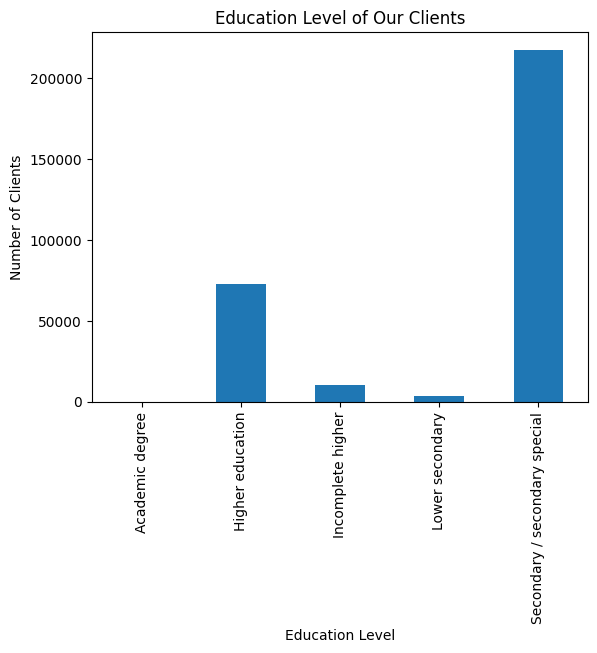

In [ ]:
dfEduSub.plot(kind = 'bar', title = 'Education Level of Our Clients')
plt.xlabel('Education Level')
plt.ylabel('Number of Clients')
#From the plot, we see that the two largest groups in terms of the education level of our clients are
#higher education (72,890 clients) and secondary/secondary special (217,499 clients).

In [ ]:
#h. Type of organization where client works
dfOrgSub = df2.groupby(['ORGANIZATION_TYPE'])['ORGANIZATION_TYPE'].count()
dfOrgSub

,ORGANIZATION_TYPE
ORGANIZATION_TYPE,
Advertising,415
Agriculture,2443
Bank,2437
Business Entity Type 1,5889
Business Entity Type 2,10462
Business Entity Type 3,66840
Cleaning,259
Construction,6632
Culture,375


Text(0, 0.5, 'Number of Clients')

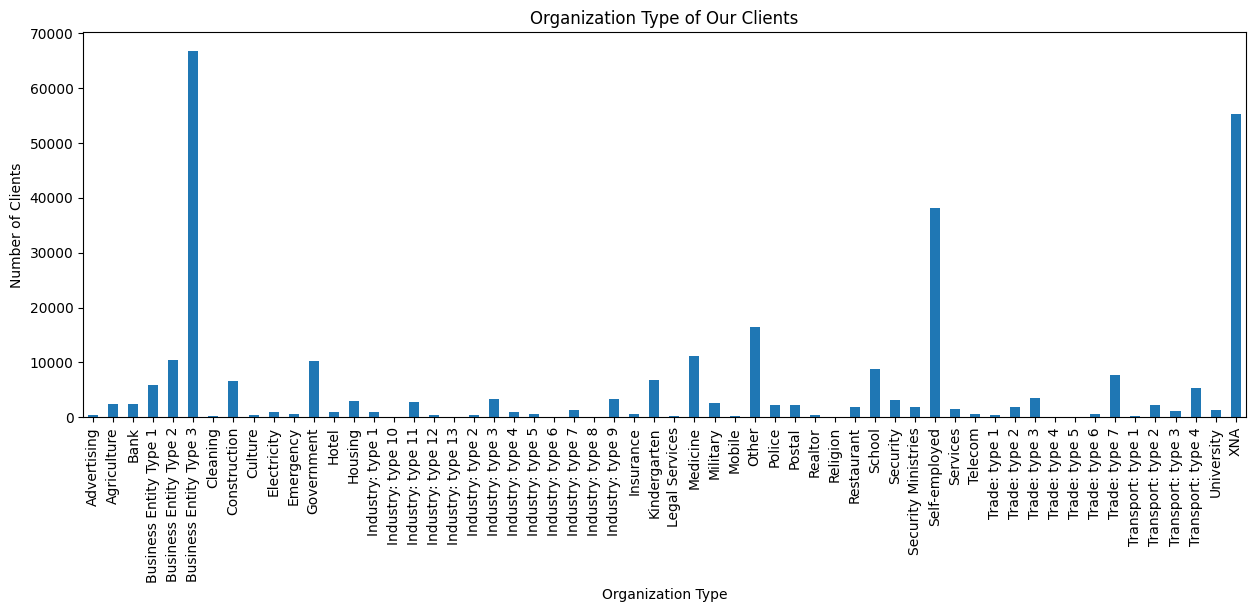

In [ ]:
fig = plt.figure(figsize=(15,5)) #Improving the display of our graph
dfOrgSub.plot(kind = 'bar', title = 'Organization Type of Our Clients')
plt.xlabel('Organization Type')
plt.ylabel('Number of Clients')
#We have many clients in non-descript categories, e.g., Industry: type n and Trade: type n.
#The three most common categories in terms of organization type are Business Entity Type 3, Self-employed,
#and XNA. It makes sense that many people taking out loans from our company are in the business world and
#self-employed, perhaps entrepreneurs.

In [ ]:
#i. Family Status of our Clients
dfFamSub = df2.groupby(['NAME_FAMILY_STATUS'])['NAME_FAMILY_STATUS'].count()
dfFamSub

,NAME_FAMILY_STATUS
NAME_FAMILY_STATUS,
Civil marriage,29527
Married,194368
Separated,19565
Single / not married,45007
Unknown,2
Widow,16026


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304495 entries, 0 to 304494
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   NAME_CONTRACT_TYPE           304495 non-null  object  
 1   CODE_GENDER                  304495 non-null  object  
 2   FLAG_OWN_CAR                 304495 non-null  object  
 3   FLAG_OWN_REALTY              304495 non-null  object  
 4   CNT_CHILDREN                 304495 non-null  int64   
 5   AMT_INCOME_TOTAL             304495 non-null  float64 
 6   AMT_CREDIT                   304495 non-null  float64 
 7   AMT_ANNUITY                  304495 non-null  float64 
 8   AMT_GOODS_PRICE              304495 non-null  float64 
 9   NAME_INCOME_TYPE             304495 non-null  object  
 10  NAME_EDUCATION_TYPE          304495 non-null  object  
 11  NAME_FAMILY_STATUS           304495 non-null  object  
 12  NAME_HOUSING_TYPE            304495 non-null

Text(0, 0.5, 'Number of Clients')

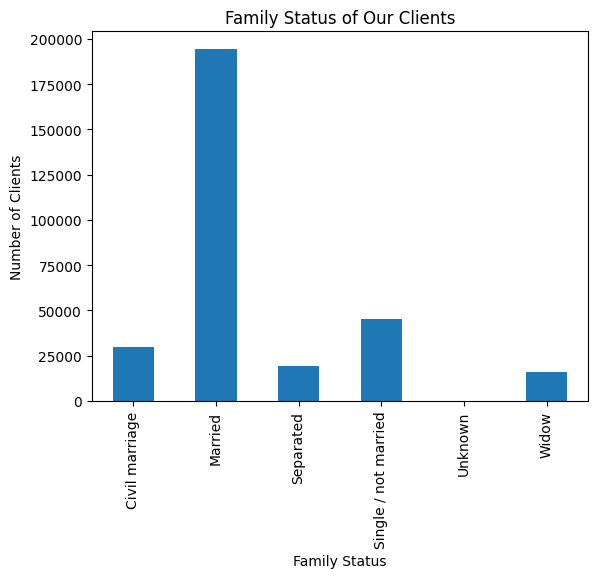

In [ ]:
dfFamSub.plot(kind = 'bar', title = 'Family Status of Our Clients')
plt.xlabel('Family Status')
plt.ylabel('Number of Clients')
#Note: There are 2 clients whose family status is unknown.
#A majority of our clients (194,368 out of 304,495 or 63.82%) are married.
#The next largest category in terms of family status is single / not married, which makes up
#45,007 out of 304,495 people or 14.78% of our clients.

In [ ]:
#Part 3 complete!

In [ ]:
# 4. Who defaults or has problems replaying loans?
# Create visualizations to show management qualities specific to those who are in default/late.
# Show three meaningful visualizations.
# Use at least one group/by or bin in your analysis.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304495 entries, 0 to 304494
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   NAME_CONTRACT_TYPE           304495 non-null  object  
 1   CODE_GENDER                  304495 non-null  object  
 2   FLAG_OWN_CAR                 304495 non-null  object  
 3   FLAG_OWN_REALTY              304495 non-null  object  
 4   CNT_CHILDREN                 304495 non-null  int64   
 5   AMT_INCOME_TOTAL             304495 non-null  float64 
 6   AMT_CREDIT                   304495 non-null  float64 
 7   AMT_ANNUITY                  304495 non-null  float64 
 8   AMT_GOODS_PRICE              304495 non-null  float64 
 9   NAME_INCOME_TYPE             304495 non-null  object  
 10  NAME_EDUCATION_TYPE          304495 non-null  object  
 11  NAME_FAMILY_STATUS           304495 non-null  object  
 12  NAME_HOUSING_TYPE            304495 non-null

In [ ]:
#a. Loan Defaults by Age Group
dfAgeBinTar = df2.groupby(['Age Bin'],as_index=False)['TARGET'].count()
#dfAgeBinTar2 = df2.groupby(['Age Bin'], as_index=True)['TARGET'].count()

/tmp/ipython-input-102-1335038139.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfAgeBinTar = df2.groupby(['Age Bin'],as_index=False)['TARGET'].count()


In [ ]:
dfAgeBinTar

,Age Bin,TARGET
0,20-25,12132
1,25-30,32625
2,30-35,39021
3,35-40,42323
4,40-45,40847
5,45-50,34674
6,50-55,34579
7,55-60,32852
8,60-65,27344
9,65-70,8098


In [ ]:
#dfAgeBinTar2

Text(0.5, 1.0, 'Loan Defaults by Age Group')

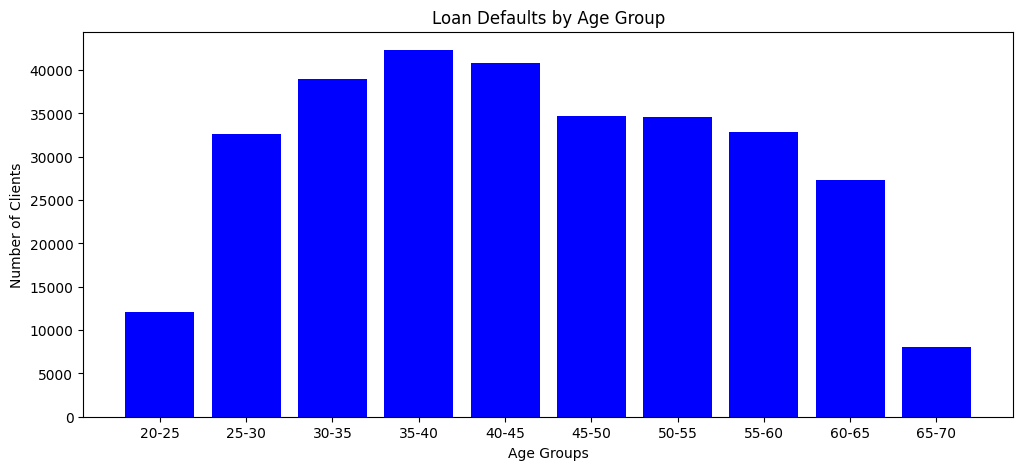

In [ ]:
fig = plt.figure(figsize= (12,5))
plt.bar(dfAgeBinTar['Age Bin'], dfAgeBinTar['TARGET'], color = 'b')
plt.xlabel('Age Groups')
plt.ylabel('Number of Clients')
plt.title('Loan Defaults by Age Group')
#When examining loan defaults by age group, we see that the weights are somewhat normally distributed.
#The age groups with the lowest number of loan defaults are clients between the ages of 20 to 25 and 65 to 70.
#The age group with the highest number of defaults is the 35 to 40 year old age group.

In [ ]:
#b. Loan Defaults by Income Group
dfIncomeBinTar = df2.groupby(['Income Bin'],as_index=False)['TARGET'].count()

/tmp/ipython-input-106-919113894.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfIncomeBinTar = df2.groupby(['Income Bin'],as_index=False)['TARGET'].count()


In [ ]:
dfIncomeBinTar

,Income Bin,TARGET
0,0-50k,4517
1,50k-100k,59181
2,100k-150k,91589
3,150k-200k,64307
4,200k-250k,48137
5,250k-300k,17039
6,300k-350k,8874
7,350k-400k,5802
8,400k-450k,4924
9,450k-500k,125


Text(0.5, 1.0, 'Loan Defaults by Income Group')

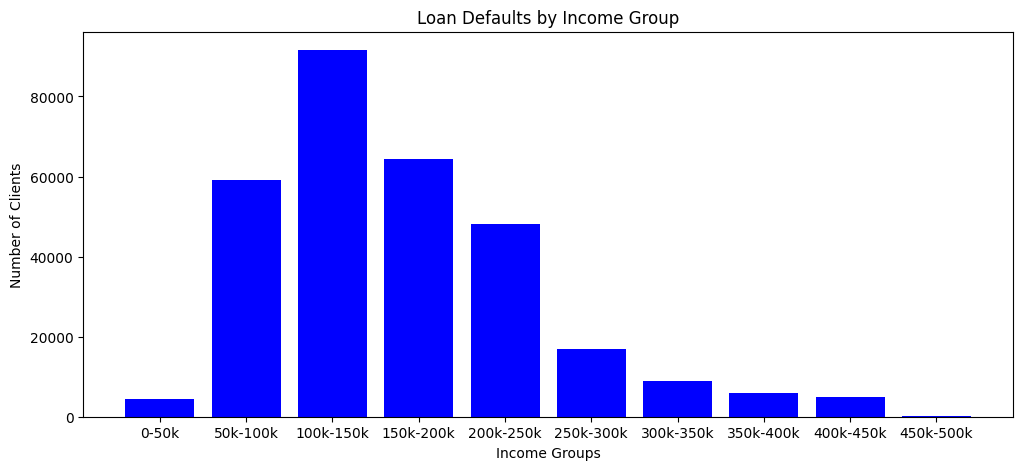

In [ ]:
fig = plt.figure(figsize= (12,5))
plt.bar(dfIncomeBinTar['Income Bin'], dfIncomeBinTar['TARGET'], color = 'b')
plt.xlabel('Income Groups')
plt.ylabel('Number of Clients')
plt.title('Loan Defaults by Income Group')
#When examining loan defaults by income group, we see that the income groups with the lowest number of loan
#defaults are at the tails, that is, clients in the 0-50k (lowest) and the five highest income groups.
#The income group with the highest number of defaults is the 100-150k income group.
#That being said, this correlation should be taken with a grain of salt since we saw above that there is
#an uneven distribution in the number of clients in terms of income level.

In [ ]:
#c. Loan Defaults by Education Level
dfEduTar = df2.groupby(['NAME_EDUCATION_TYPE'],as_index=False)['TARGET'].count()

In [ ]:
dfEduTar

,NAME_EDUCATION_TYPE,TARGET
0,Academic degree,156
1,Higher education,72890
2,Incomplete higher,10143
3,Lower secondary,3807
4,Secondary / secondary special,217499


Text(0.5, 1.0, 'Loan Defaults by Education Level')

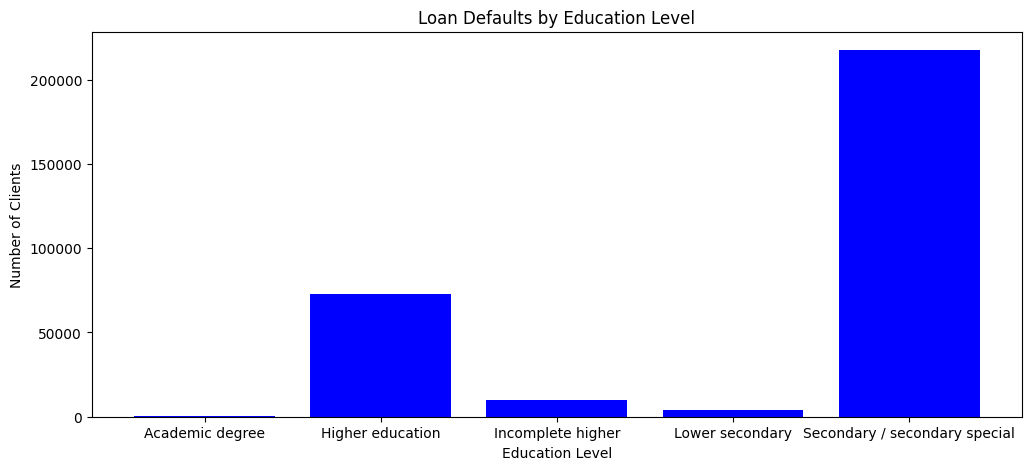

In [ ]:
fig = plt.figure(figsize= (12,5))
plt.bar(dfEduTar['NAME_EDUCATION_TYPE'], dfEduTar['TARGET'], color = 'b')
plt.xlabel('Education Level')
plt.ylabel('Number of Clients')
plt.title('Loan Defaults by Education Level')

#When examining loan defaults by education level, we see that the group with the highest number of defaults
#is the secondary/secondary special education group, followed by the higher education group.
#That being said, this conclusion should be taken with a grain of salt since we saw above that there is
#an uneven distribution in the number of clients in terms of education level.

In [ ]:
#Part 4 complete!

In [ ]:
# 5. Prepare the data for a regression analysis
# The ABC management team has heard that it might be possible to use their data to make predictions.
#They don’t know much about data analytics. We are hoping that an example of what is possible will help them
#understand better.
# Prepare the data file to run with a regression analysis. Use the techniques and methods discussed in class.

In [ ]:
import sklearn

In [ ]:
#from sklearn.linear_model import LinearRegression

#Above line commented out because we'll be using LogisticRegression here.

In [ ]:
df2.info()
#Note: The following columns are categorical:
#NAME_CONTRACT_TYPE
#CODE_GENDER
#FLAG_OWN_CAR
#FLAG_OWN_REALTY
#NAME_INCOME_TYPE
#NAME_EDUCATION_TYPE
#NAME_FAMILY_STATUS
#NAME_HOUSING_TYPE
#OCCUPATION_TYPE
#ORGANIZATION_TYPE
#Age Bin
#Income Bin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304495 entries, 0 to 304494
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   NAME_CONTRACT_TYPE           304495 non-null  object  
 1   CODE_GENDER                  304495 non-null  object  
 2   FLAG_OWN_CAR                 304495 non-null  object  
 3   FLAG_OWN_REALTY              304495 non-null  object  
 4   CNT_CHILDREN                 304495 non-null  int64   
 5   AMT_INCOME_TOTAL             304495 non-null  float64 
 6   AMT_CREDIT                   304495 non-null  float64 
 7   AMT_ANNUITY                  304495 non-null  float64 
 8   AMT_GOODS_PRICE              304495 non-null  float64 
 9   NAME_INCOME_TYPE             304495 non-null  object  
 10  NAME_EDUCATION_TYPE          304495 non-null  object  
 11  NAME_FAMILY_STATUS           304495 non-null  object  
 12  NAME_HOUSING_TYPE            304495 non-null

In [ ]:
df2.head() #Let's examine the dataset again to decide if there are any other columns to drop

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET,AGE,Age Bin,Income Bin
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,...,0,0,0,0,0,Business Entity Type 3,1,25.920548,25-30,200k-250k
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,...,0,0,0,0,0,School,0,45.931507,45-50,250k-300k
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,...,0,0,0,0,0,Government,0,52.180822,50-55,50k-100k
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,...,0,0,0,0,0,Business Entity Type 3,0,52.068493,50-55,100k-150k
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,...,0,0,0,1,1,Religion,0,54.608219,50-55,100k-150k


In [ ]:
X = df2
#The following are the remaining categorical variables in our dataframe:
#X = X.drop('NAME_CONTRACT_TYPE', axis = 1) #decided to include
#X = X.drop('CODE_GENDER', axis = 1) #included
#X = X.drop('FLAG_OWN_CAR', axis = 1) #included
#X = X.drop('FLAG_OWN_REALTY', axis = 1) #included
#X = X.drop('NAME_INCOME_TYPE', axis = 1) #included
#X = X.drop('NAME_EDUCATION_TYPE', axis = 1) #included
#X = X.drop('NAME_FAMILY_STATUS', axis = 1) #included
#X = X.drop('NAME_HOUSING_TYPE', axis = 1) #included
#X = X.drop('OCCUPATION_TYPE', axis = 1) #drop since this column has null data
X = X.drop('ORGANIZATION_TYPE', axis = 1) #drop since there are many unique values
X = X.drop('Age Bin', axis = 1) #drop since we already have an age column
X = X.drop('Income Bin', axis = 1) #drop since we already have a column that surveys income

X = X.drop('REG_REGION_NOT_LIVE_REGION', axis = 1)
X = X.drop('REG_REGION_NOT_WORK_REGION', axis = 1)
X = X.drop('LIVE_REGION_NOT_WORK_REGION', axis = 1)
X = X.drop('REG_CITY_NOT_LIVE_CITY', axis = 1)
X = X.drop('REG_CITY_NOT_WORK_CITY', axis = 1)
X = X.drop('LIVE_CITY_NOT_WORK_CITY', axis = 1)

#Although some of these columns are of interest, we drop them for our Logistic Regression because
#they are categorical variables and they contain many unique values.

#I dropped the REG_REGION, LIVE_REGION, REG_CITY, and LIVE_CITY columns because they did not improve
#the R^2 value. In part 1, I already dropped the OWN_CAR_AGE column
#because I considerd it irrelevant to the TARGET variable (whether the client defaulted).

In [ ]:
X

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,TARGET,AGE
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,...,-2120,1,1,0,1,1,0,1.0,1,25.920548
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,...,-291,1,1,0,1,1,0,2.0,0,45.931507
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,...,-2531,1,1,1,1,1,0,1.0,0,52.180822
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,...,-2437,1,1,0,1,0,0,2.0,0,52.068493
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,...,-3458,1,1,0,1,0,0,1.0,0,54.608219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304490,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,...,-1982,1,1,0,1,0,0,1.0,0,25.553425
304491,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,...,-4090,1,0,0,1,1,0,1.0,0,56.917808
304492,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,...,-5150,1,1,0,1,0,1,1.0,0,41.002740
304493,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,...,-931,1,1,0,1,0,0,2.0,1,32.769863


In [ ]:
X = pd.get_dummies(X)

In [ ]:
X

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0,202500.0,406597.5,24700.5,351000.0,-9461,-637,-3648.0,-2120,1,...,False,True,False,False,False,True,False,False,False,False
1,0,270000.0,1293502.5,35698.5,1129500.0,-16765,-1188,-1186.0,-291,1,...,False,False,False,False,False,True,False,False,False,False
2,0,67500.0,135000.0,6750.0,135000.0,-19046,-225,-4260.0,-2531,1,...,False,True,False,False,False,True,False,False,False,False
3,0,135000.0,312682.5,29686.5,297000.0,-19005,-3039,-9833.0,-2437,1,...,False,False,False,False,False,True,False,False,False,False
4,0,121500.0,513000.0,21865.5,513000.0,-19932,-3038,-4311.0,-3458,1,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304490,0,157500.0,254700.0,27558.0,225000.0,-9327,-236,-8456.0,-1982,1,...,True,False,False,False,False,False,False,False,False,True
304491,0,72000.0,269550.0,12001.5,225000.0,-20775,365243,-4388.0,-4090,1,...,False,False,False,True,False,True,False,False,False,False
304492,0,153000.0,677664.0,29979.0,585000.0,-14966,-7921,-6737.0,-5150,1,...,True,False,False,False,False,True,False,False,False,False
304493,0,171000.0,370107.0,20205.0,319500.0,-11961,-4786,-2562.0,-931,1,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
X.info() #be sure that all predictor variables are numerical to prepare for regression

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304495 entries, 0 to 304494
Data columns (total 52 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   CNT_CHILDREN                                       304495 non-null  int64  
 1   AMT_INCOME_TOTAL                                   304495 non-null  float64
 2   AMT_CREDIT                                         304495 non-null  float64
 3   AMT_ANNUITY                                        304495 non-null  float64
 4   AMT_GOODS_PRICE                                    304495 non-null  float64
 5   DAYS_BIRTH                                         304495 non-null  int64  
 6   DAYS_EMPLOYED                                      304495 non-null  int64  
 7   DAYS_REGISTRATION                                  304495 non-null  float64
 8   DAYS_ID_PUBLISH                                    304495 non-null  int64 

In [ ]:
Y = df2['TARGET'] #We'll use the TARGET variable (whether the client defaulted) as the response variable
X, Y

(        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
 0                  0          202500.0    406597.5      24700.5   
 1                  0          270000.0   1293502.5      35698.5   
 2                  0           67500.0    135000.0       6750.0   
 3                  0          135000.0    312682.5      29686.5   
 4                  0          121500.0    513000.0      21865.5   
 ...              ...               ...         ...          ...   
 304490             0          157500.0    254700.0      27558.0   
 304491             0           72000.0    269550.0      12001.5   
 304492             0          153000.0    677664.0      29979.0   
 304493             0          171000.0    370107.0      20205.0   
 304494             0          157500.0    675000.0      49117.5   
 
         AMT_GOODS_PRICE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
 0              351000.0       -9461           -637            -3648.0   
 1             1129500.0      -167

In [ ]:
#Our X and Y have been defined, now we can fit the model.
#lr = LinearRegression() #instantiate the Linear Regression object
#lr.fit(X,Y)

#Notes from Prof. Feldman Zoom Meeting: Logistic Regression is required here since the TARGET variable
#is binary. (It takes on the two values of 0 and 1.)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression() #instantiate the Logistic Regression object
lr.fit(X,Y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Part 5 complete!

In [ ]:
# 6. Run the regression analysis
# Show scoring and a confusion matrix. You do not need to split the data.  Running it as a full dataset is fine.

In [ ]:
#Scoring
lr.score(X,Y) #R squared: 0.9189937437396345
#We see that there is a strong correlation between the predictor variables we left in the dataframe
#and the TARGET response variable (whether the client defaulted).

0.9189937437396345

In [ ]:
#Confusion Matrix
pred_test = lr.predict(X)
pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn import metrics

In [ ]:
Y

,TARGET
0,1
1,0
2,0
3,0
4,0
...,...
304490,0
304491,0
304492,0
304493,1


In [ ]:
print(metrics.confusion_matrix(Y, pred_test))

[[279829      3]
 [ 24663      0]]


In [ ]:
cmtx = pd.DataFrame(
    metrics.confusion_matrix(Y,pred_test),
    index=['actual:yes', 'actual:no'],
    columns=['pred:yes', 'pred:no']
)
print(cmtx)

            pred:yes  pred:no
actual:yes    279829        3
actual:no      24663        0


In [ ]:
#Part 6 & Final Project complete!

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
#Exam Practice:
X_train, X_test, y_train,y_test = train_test_split(X,Y, test_size=.3, random_state=42)

In [ ]:
X_train.shape

(213146, 52)

In [ ]:
X_test.shape

(91349, 52)

In [ ]:
y_train.shape

(213146,)

In [ ]:
y_test.shape

(91349,)

In [ ]:
#run with the training set
lr.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.score(X_train,y_train)

0.9196372439548478

In [ ]:
pred_train = lr.predict(X_train)

In [ ]:
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y_train,pred_train),
    index=['actual:yes', 'actual:no'],
    columns=['pred:yes', 'pred:no']
)
print(cmtx)

            pred:yes  pred:no
actual:yes    196017        3
actual:no      17126        0


In [ ]:
##lets do this with the test set now

In [ ]:
lr.fit(X_test,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.score(X_test,y_test)

0.9174922549781607

In [ ]:
pred_test = lr.predict(X_test)

In [ ]:
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y_test,pred_test),
    index=['actual:yes', 'actual:no'],
    columns=['pred:yes', 'pred:no']
)
print(cmtx)

            pred:yes  pred:no
actual:yes     83812        0
actual:no       7537        0
